<a href="https://colab.research.google.com/github/PrathameshBawane/CODSOFT/blob/main/Task_3_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Datasets/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [43]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [45]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [48]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

X = data.drop('Exited', axis=1)
y = data['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


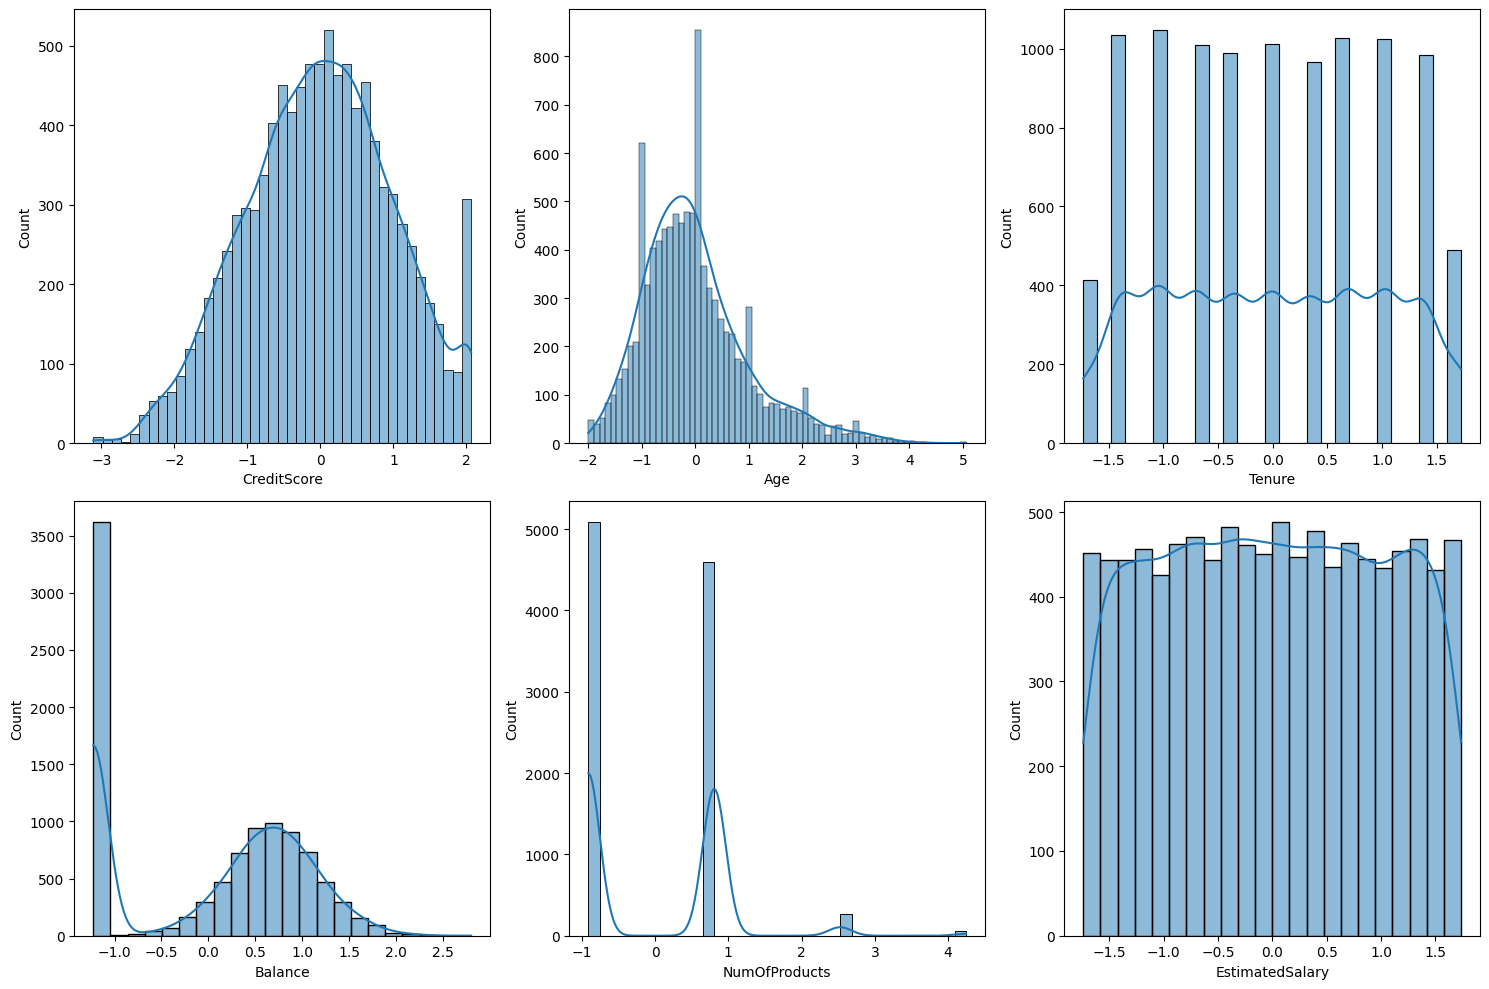

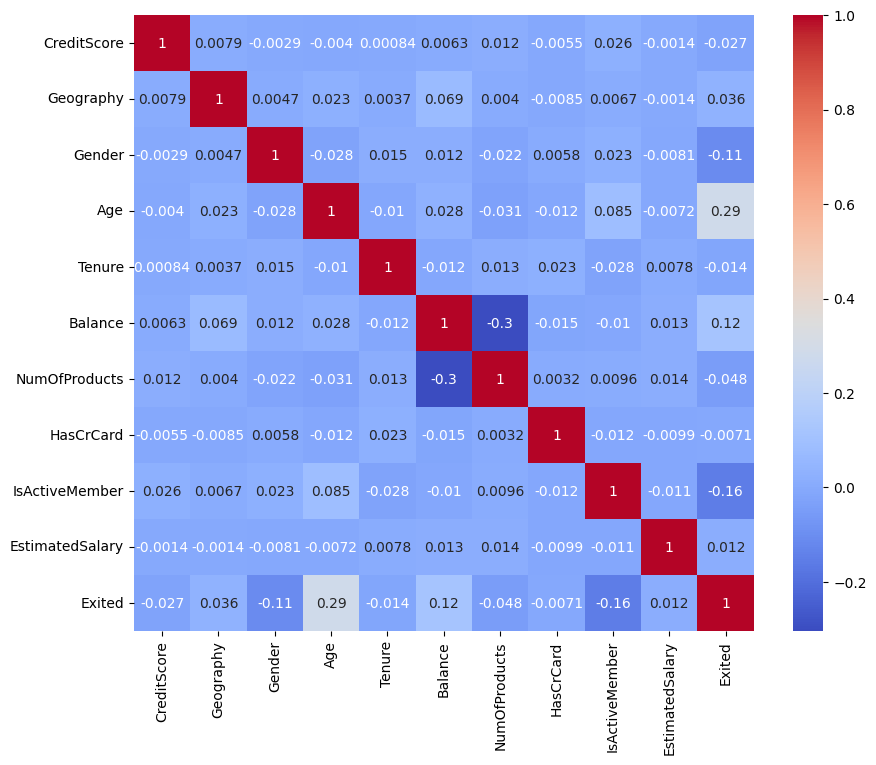

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data['CreditScore'], kde=True, ax=axs[0, 0])
sns.histplot(data['Age'], kde=True, ax=axs[0, 1])
sns.histplot(data['Tenure'], kde=True, ax=axs[0, 2])
sns.histplot(data['Balance'], kde=True, ax=axs[1, 0])
sns.histplot(data['NumOfProducts'], kde=True, ax=axs[1, 1])
sns.histplot(data['EstimatedSalary'], kde=True, ax=axs[1, 2])
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg

LogisticRegression(random_state=42)

In [51]:
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [53]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [54]:
# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb

GradientBoostingClassifier(random_state=42)

In [55]:
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_gb

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return accuracy, cm, cr

# Evaluate Logistic Regression
accuracy_logreg, cm_logreg, cr_logreg = evaluate_model(y_test, y_pred_logreg)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(cm_logreg)
print("Classification Report:")
print(cr_logreg)

# Evaluate Random Forest
accuracy_rf, cm_rf, cr_rf = evaluate_model(y_test, y_pred_rf)
print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(cm_rf)
print("Classification Report:")
print(cr_rf)

# Evaluate Gradient Boosting
accuracy_gb, cm_gb, cr_gb = evaluate_model(y_test, y_pred_gb)
print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb}")
print("Confusion Matrix:")
print(cm_gb)
print("Classification Report:")
print(cr_gb)


Logistic Regression:
Accuracy: 0.8155
Confusion Matrix:
[[1559   48]
 [ 321   72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Random Forest:
Accuracy: 0.864
Confusion Matrix:
[[1545   62]
 [ 210  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Gradient Boosting:
Accuracy: 0.8655
Confusion Matrix:
[[1547   60]
 [ 209  184]]
Classification Report:
              precision    recall  f1

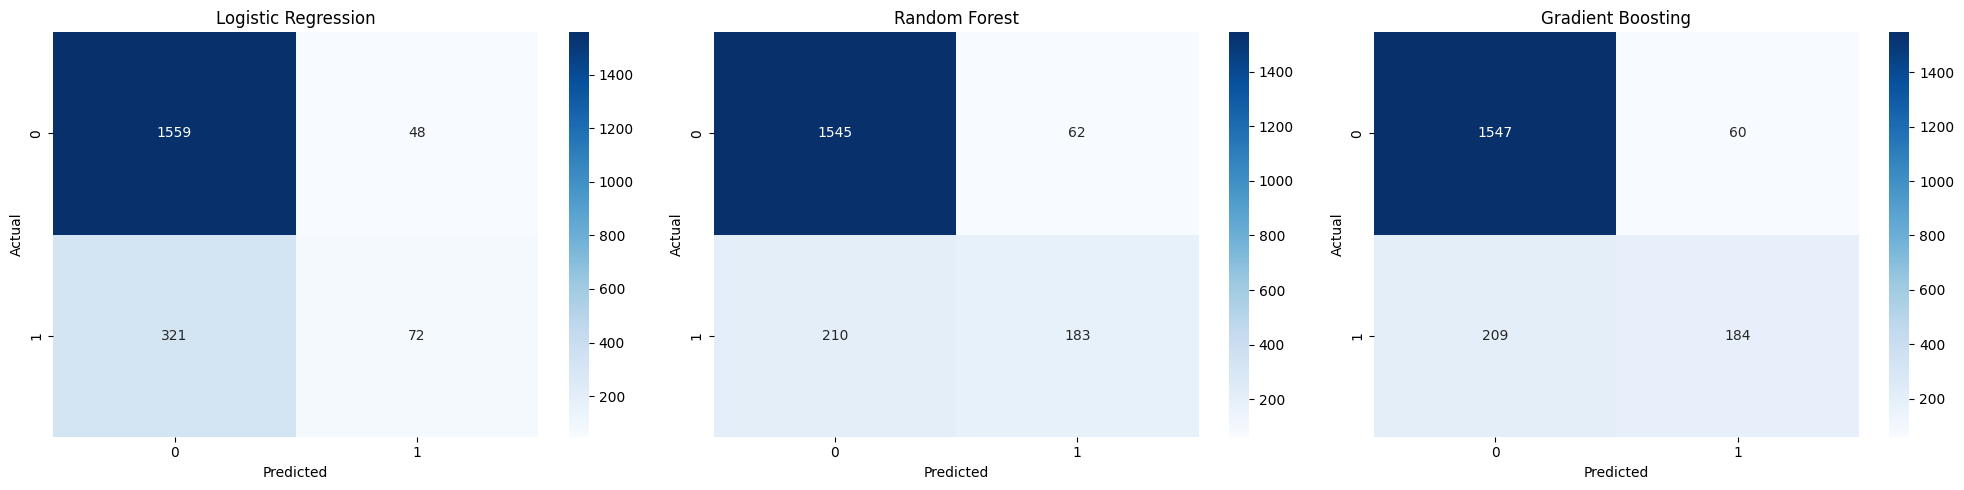

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Confusion matrix for Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Logistic Regression')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Confusion matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Random Forest')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

# Confusion matrix for Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_title('Gradient Boosting')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()